In [ ]:
# Correr esto para importar scian_datagenerator.py directamente desde el drive. 
# sino puede copiarse manualmente en el menú de la izquierda

# Mount your google drive in google colabfrom google.colab import drive
# This will prompt for authorization.
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(0,'/content/drive/MyDrive/Sem_interno_NN_2021/Codigos/Sciann-Laplace')

Mounted at /content/drive


In [ ]:
import numpy as np 
from numpy import pi
import matplotlib.pyplot as plt
!pip install sciann
import sciann as sn 
from sciann_datagenerator import * 

     |████████████████████████████████| 173 kB 5.1 MB/s 
     |████████████████████████████████| 454.4 MB 21 kB/s 
     |████████████████████████████████| 561 kB 26.4 MB/s 
     |████████████████████████████████| 4.0 MB 34.9 MB/s 
     |████████████████████████████████| 462 kB 56.7 MB/s 
     |████████████████████████████████| 1.2 MB 48.5 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68721 sha256=4c4a77454ef8fc7fac3a65c4227109772d851286f887e2a50905db33c193779e
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
 

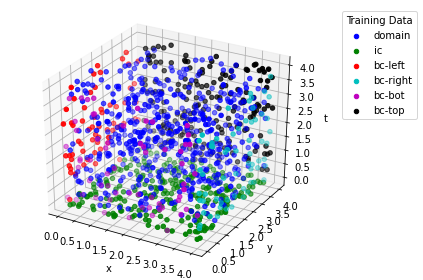

In [ ]:
#dg = DataGeneratorXY([0.,1.], [0.,1.], num_sample=1000)
#dg = DataGeneratorXT([0.,1.], [0.,1.],num_sample=1000)
dg = DataGeneratorXYT([0.,4.], [0.,4.], [0.,4.],num_sample=1000)
dg.plot_data()

In [ ]:
t = sn.Variable('t')
x = sn.Variable('x')
y = sn.Variable('y') # esto queda para la proxima ;)

v = sn.Functional('v', [x,y,t], 4*[40], 'tanh', res_net=True)

In [ ]:
L1 = sn.diff(v, x, order=1) + sn.diff(v, y, order=1) + sn.diff(v, t, order=1)

#BC_top1 = (y==1.)*(x<0.5)*sn.abs(T - 2*x)
#BC_top2 = (y==1.)*(x>=0.5)*sn.abs(T - (2-2*x))
#BC_right = (x==1.)*sn.abs(T)
#BC_bot = (y==0.)*sn.abs(T)
IC = (t==0.)*sn.abs(v-sn.sin(x*y))
BC_left = (x==0.)*sn.abs(v)
BC_bot = (y==0.)*sn.abs(v)


In [ ]:
#m = sn.SciModel([x,y], [L1, BC_top1, BC_top2, BC_left, BC_right, BC_bot], optimizer='adam')
m = sn.SciModel([x,y,t], [L1, IC, BC_left,BC_bot], optimizer='adam')

In [ ]:
dg = DataGeneratorXYT([0.,4.], [0.,4.],[0.,4.], num_sample=10000, 
                     targets=['domain', 'ic', 'bc-left', 'bc-bot'])
input_data, target_data = dg.get_data()

In [ ]:
h = m.train(input_data, target_data, 
            epochs=100,
            learning_rate=0.001,
            batch_size=200,
            adaptive_weights={'method': 'NTK', 'freq':10, 'use_score':True}
           )


Total samples: 11250 
Batch size: 200 
Total batches: 57 


+ NTK evaluation time [s]: 1.748429298400879 

+ adaptive_weights at epoch 1: [0.4278642484053209, 0.47521687993178696, 1.514053099185722, 1.5828657724771702]
Epoch 1/100
57/57 [==============================] - 6s 12ms/step - batch: 28.0000 - size: 197.3684 - loss: 0.5610 - add_4_loss: 0.2106 - mul_70_loss: 0.4659 - mul_71_loss: 0.0236 - mul_72_loss: 0.1350 - lr: 0.0010 - time: 10.2360 - loss_weight_0: 0.4279 - loss_weight_1: 0.4752 - loss_weight_2: 1.5141 - loss_weight_3: 1.5829 - loss_gradient_0: 1302.8663 - loss_gradient_1: 1313.5703 - loss_gradient_2: 638.1795 - loss_gradient_3: 557.7156
Epoch 2/100
57/57 [==============================] - 1s 9ms/step - batch: 28.0000 - size: 197.3684 - loss: 0.2002 - add_4_loss: 0.0466 - mul_70_loss: 0.3604 - mul_71_loss: 0.0029 - mul_72_loss: 0.0029 - lr: 0.0010 - time: 0.5097 - loss_weight_0: 0.4279 - loss_weight_1: 0.4752 - loss_weight_2: 1.5141 - loss_weight_3: 1.5829 - loss_gradien

In [ ]:
x_test, y_test, t_test = np.meshgrid(np.linspace(0,4,100), np.linspace(0,4,100),np.linspace(0,4,100))

In [ ]:
print(y_test[9,30,99])
print(Y[9,30])

0.09090909090909091
0.09090909090909091


In [ ]:
v_test = v.eval([x_test, y_test, t_test])

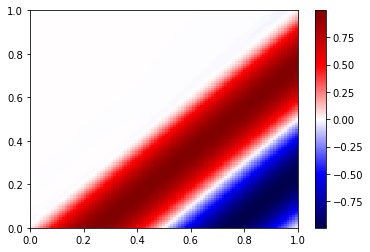

In [ ]:
im = plt.pcolor(x_test, t_test, v_test, cmap='seismic')#, shading='auto')
plt.colorbar(im)

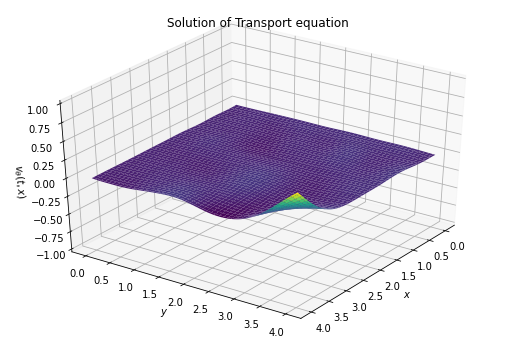

In [ ]:
#%matplotlib qt
from mpl_toolkits.mplot3d import axes3d
#%matplotlib notebook

# Set up meshgrid
N = 100
#tspace = np.linspace(0, 2, N)
xspace = np.linspace(0, 4, N)
yspace = np.linspace(0, 4, N)
X, Y = np.meshgrid(xspace, yspace)

#Xgrid = np.vstack([T.flatten(),X.flatten()]).T
# Determine predictions of u(t, x)
#upred = model(tf.cast(Xgrid,DTYPE))

v_test = v.eval([x_test, y_test, t_test])
#v_test = v.eval([X, T])

# Reshape upred
#U = upred.numpy().reshape(N+1,N+1)

# Surface plot of solution v(x,t)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_test[:,:,80], y_test[:,:,80], v_test[:,:,80], cmap='viridis');
#ax.plot_surface(x_test[:,:,99], y_test[:,:,99], np.sin(x_test[:,:,99]*y_test[:,:,99]), cmap='viridis');
ax.view_init(35,35)
ax.set_zlim((-1,1))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$v_\\theta(t,x)$')
ax.set_title('Solution of Transport equation');

In [ ]:
%matplotlib qt

ImportError: ignored

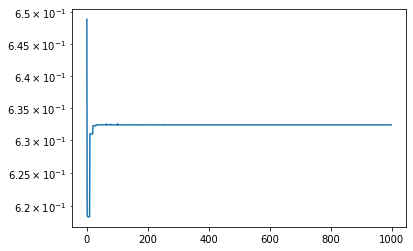

In [ ]:
plt.semilogy(h.history['loss'])